# Exploratory Data Analysis

Here, we will explore the Boston Marathon data that we cleaned in the [cleaning notebook](https://github.com/tommcd09/marathon-pace-strategy/blob/main/cleaning.ipynb).

## I. Import packages and data

Let's import the packages we will need, import the data to a pandas DataFrame, and look at some summary information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import edafuncs as ef

pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

boston = pd.read_csv('./data/boston_clean.csv')

boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   place_overall   4553 non-null   int64  
 1   place_gender    4553 non-null   int64  
 2   place_division  4553 non-null   int64  
 3   gender          4553 non-null   int64  
 4   runner_id       4553 non-null   int64  
 5   first_half      4553 non-null   float64
 6   finish          4553 non-null   float64
 7   country         4493 non-null   object 
 8   last_name       4553 non-null   object 
 9   first_name      4553 non-null   object 
 10  second_half     4553 non-null   float64
 11  split_diff      4553 non-null   float64
 12  bq              4553 non-null   int64  
 13  group           4553 non-null   object 
dtypes: float64(4), int64(6), object(4)
memory usage: 498.1+ KB


Everything is in the data type that we need. Now let's view some descriptive statistics of the overall data.

In [2]:
boston.describe()

,place_overall,place_gender,place_division,gender,runner_id,first_half,finish,second_half,split_diff,bq
count,4553.00,4553.00,4553.00,4553.00,4553.00,4553.00,4553.00,4553.00,4553.00,4553.00
mean,5568.87,2578.07,1152.97,0.45,8163.61,1.66,3.52,1.86,5.38,0.51
std,4256.20,2149.17,676.13,0.50,6366.22,0.27,0.63,0.38,4.62,0.50
min,1.00,1.00,1.00,0.00,2.00,1.07,2.16,1.06,-10.32,0.00
25%,1744.00,736.00,573.00,0.00,2127.00,1.45,3.04,1.57,2.03,0.00
50%,4702.00,1843.00,1143.00,0.00,7589.00,1.63,3.42,1.79,4.61,1.00
75%,9150.00,4340.00,1713.00,1.00,12023.00,1.82,3.93,2.11,7.95,1.00
max,13847.00,7283.00,2499.00,1.00,19651.00,2.45,5.00,3.04,31.73,1.00


Right away, we can see that both the mean and median runner ran positive splits, with split differences of 5.38% and 4.61% respectively. However, there is a wide range of split differences, anywhere from -10.32% to 31.73%. The mean finish time was fairly fast at about 3.5 hours, reflecting the fact that the Boston Marathon tends to attract fast runners.

## II. Single Variables

### 1. Finish Time

Let's visualize the distribution of finish times for all runners. We will use custom plotting functions throughout this notebook.

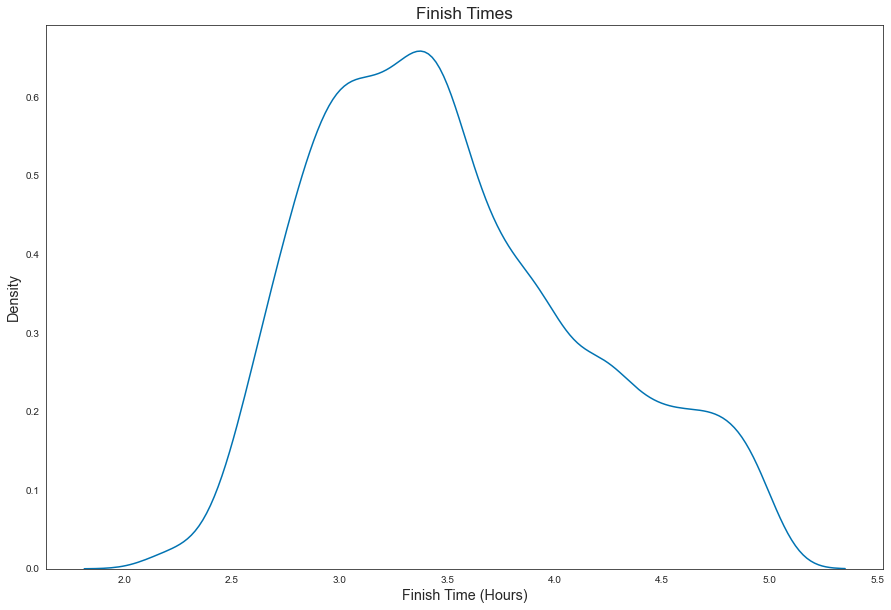

In [3]:
sns.set_style('white')
sns.set_palette('colorblind')

labels = ['Finish Times', 'Finish Time (Hours)']
ef.marathon_plot(boston, labels, col='finish')
plt.show()

### 2. Finish Time by BQ

Let's also break this distribution down by Boston Marathon qualifying vs. not Boston Marathon qualifying times.

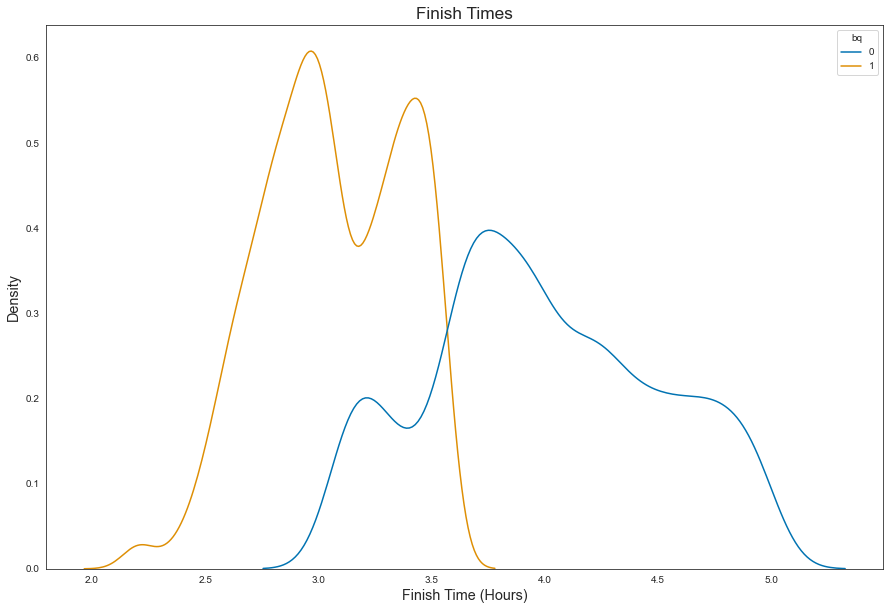

In [4]:
ef.marathon_plot(boston, labels, col='finish', hue='bq')
plt.show()

As expected, the BQ finish times are generally faster than the non-BQ finish times.

### 3. Split Difference

Now let's visualize the overall distribution of split differences, with a dashed green line indicating a perfectly even-paced race. Points to the left of the line indicate a negative split (faster second half than first half) and points to the right indicate a positive split (slower second half than first half).

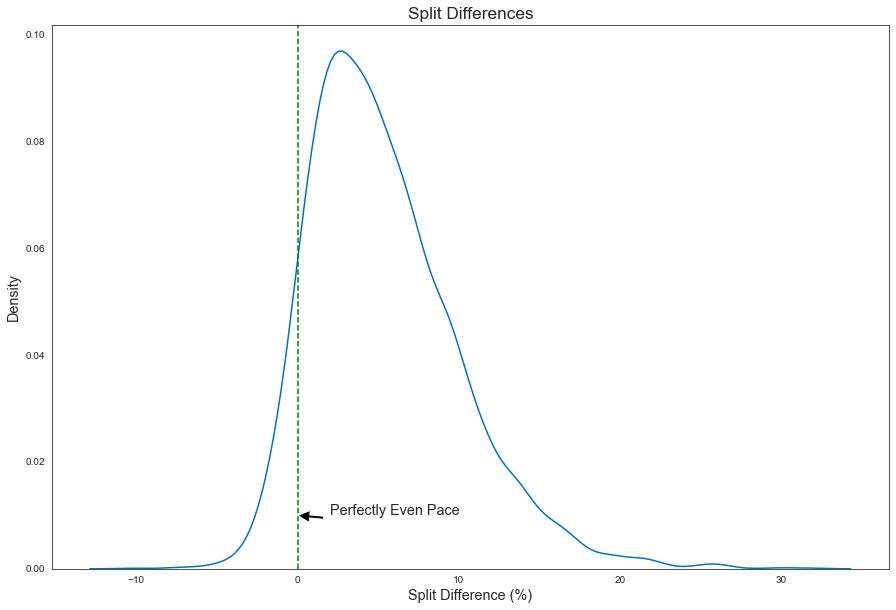

In [5]:
labels = ['Split Differences', 'Split Difference (%)']
ef.marathon_plot_axvline(boston, labels, col='split_diff')
plt.show()

As we've already noted, most runners ran positive splits, which makes sense. The marathon is a very long race, and after about 20 miles of running it becomes very difficult to maintain the same pace. The distribution looks fairly close to normal, though there is a bit of a positive skew and kurtosis. This also makes sense. Based on previous research [1-3], we would expect most elite runners to be clustered closer to 0 on this distribution, with recreational runners clustered further to the right and with a wider spread overall.

### 4. Split Difference by BQ

Let's break this split difference distribution down by BQ vs. non-BQ.

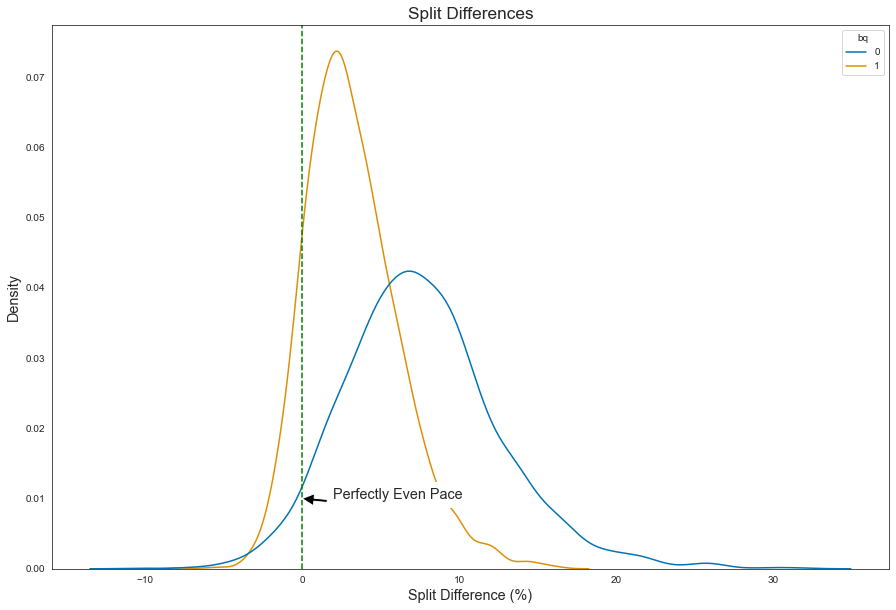

In [6]:
ef.marathon_plot_axvline(boston, labels, col='split_diff', hue='bq')
plt.show()

This tends to confirm what we noted above. Both of these individual distributions are much more bell-like, with the curve for non-BQ runners having a wider spread and longer tails. If we were to just look at these distributions, we might conclude that elite runners ran more evenly paced in the 2021 Boston Marathon, while recreational runners tended to run more positively split races and have more variation in their pacing overall.

For another view of this data, let's look at a table of descriptive statistics for split difference grouped by BQ.

In [7]:
boston[['split_diff', 'bq']].groupby('bq').describe()

split_diff                                       
        count mean  std    min  25%  50%   75%   max
bq                                                  
0     2237.00 7.59 4.95 -10.32 4.29 7.22 10.34 31.73
1     2316.00 3.24 2.99  -7.93 1.13 2.82  4.97 16.34

Both the mean and standard deviation are lower for BQ runners, consistent with the plots above.

### 5. Finish Time by Gender

Next, let's break down the distribution of finish times by gender.

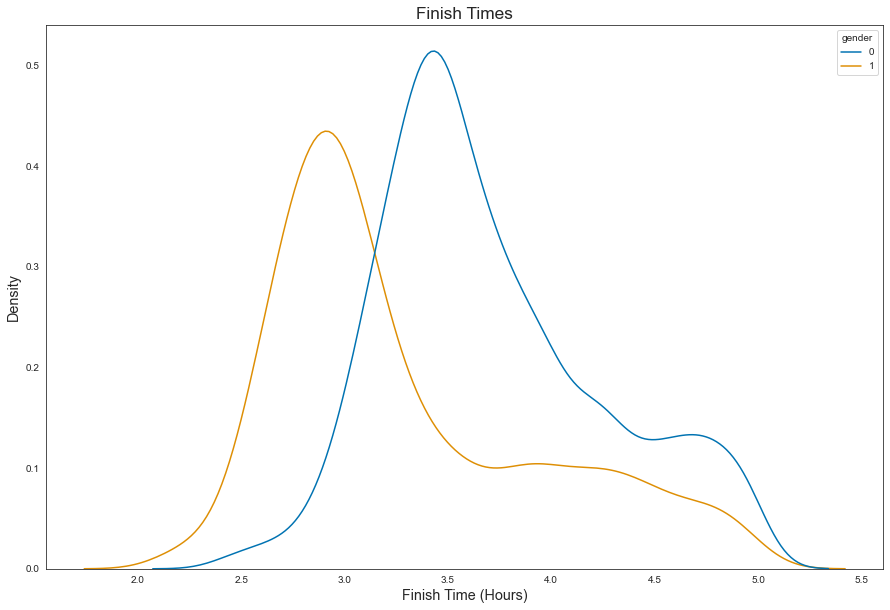

In [8]:
labels = ['Finish Times', 'Finish Time (Hours)']
ef.marathon_plot(boston, labels, col='finish', hue='gender')
plt.show()

The distribution of men's finish times is generally faster than the distribution for women's times. There is a higher density of runners towards the faster end of the x-axis, reflecting the high proportion of fast runners in the Boston Marathon.

### 6. Finish Time by BQ and Gender

Let's further break down finish times by both BQ and gender.

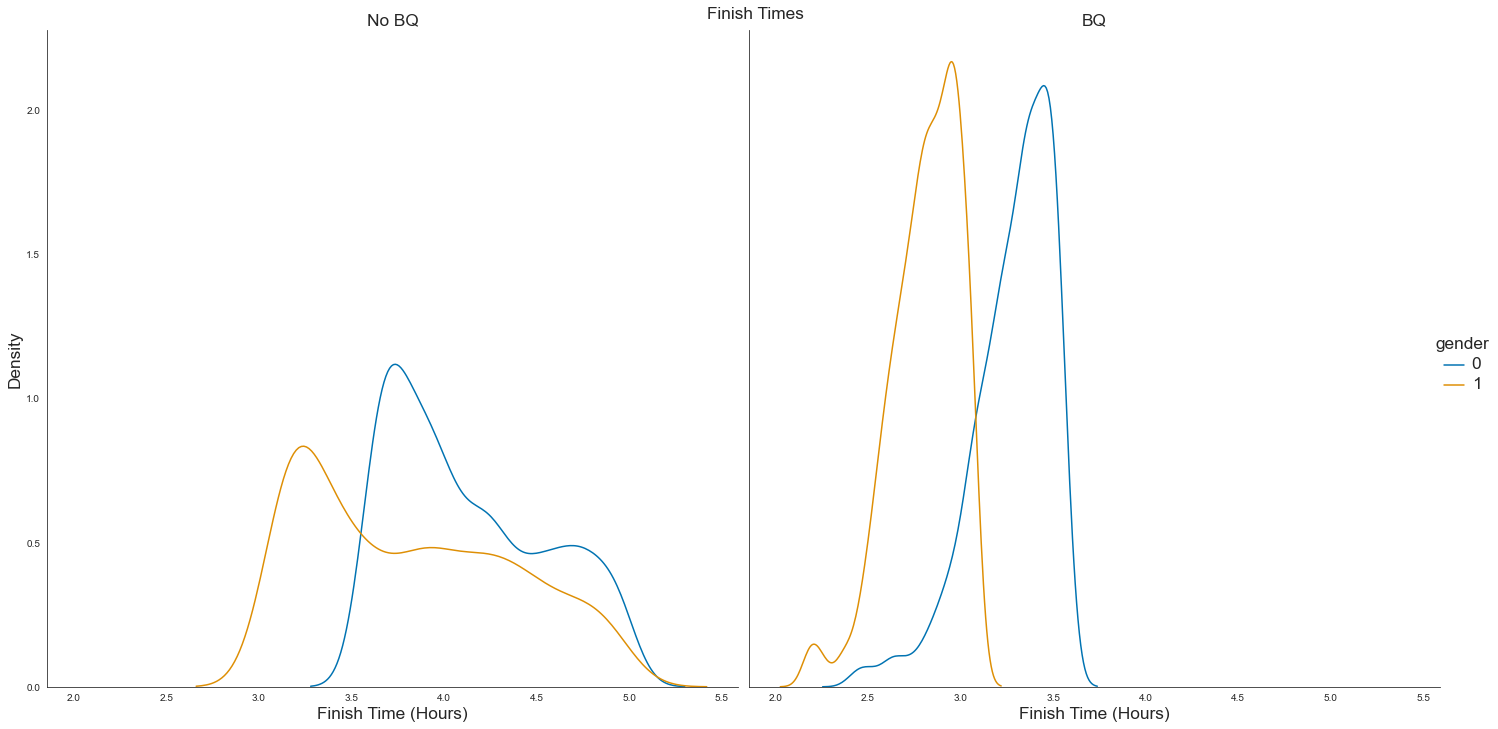

In [9]:
g = sns.FacetGrid(boston, col='bq', hue='gender', height=10)
labels = labels = ['Finish Times', 'No BQ', 'BQ', 'Finish Time (Hours)']
ef.marathon_facetgrid(g, 'finish', labels)
plt.show()

Men's times are generally faster than women's times for both BQ and non-BQ groups, and BQ times are generally faster than non-BQ times.

### 7. Split Difference by Gender

Let's break down the distribution of split differences by gender.

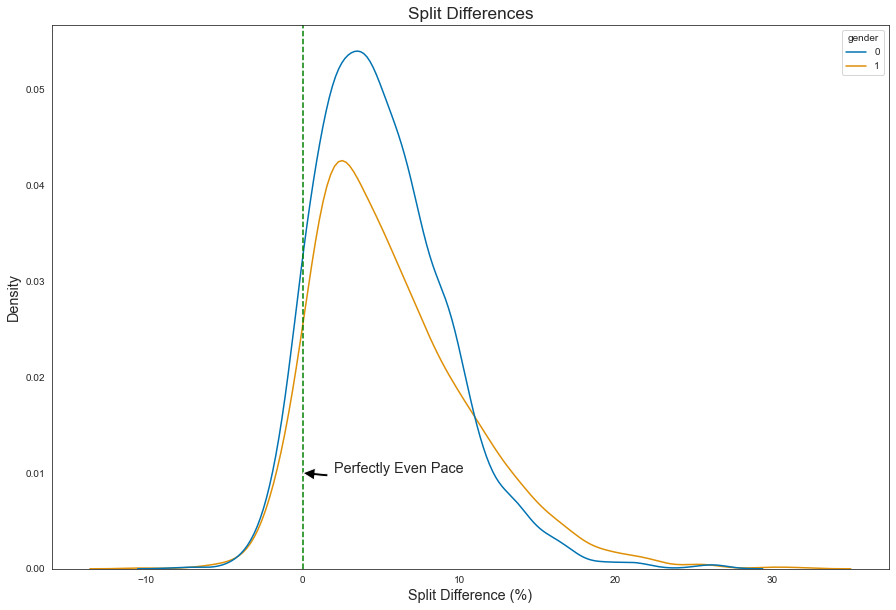

In [10]:
labels = ['Split Differences', 'Split Difference (%)']
ef.marathon_plot_axvline(boston, labels, col='split_diff', hue='gender')
plt.show()

The distribution of men's split differences is wider than the distribution of women's split differences, and it is shifted a bit further from 0. If we were just looking at these distributions, we might conclude that women tended to run a bit more evenly paced in the 2021 Boston Marathon and were more consistent in their pacing.

### 8. Split Difference by BQ and Gender

Let's break this down further by both gender and BQ.

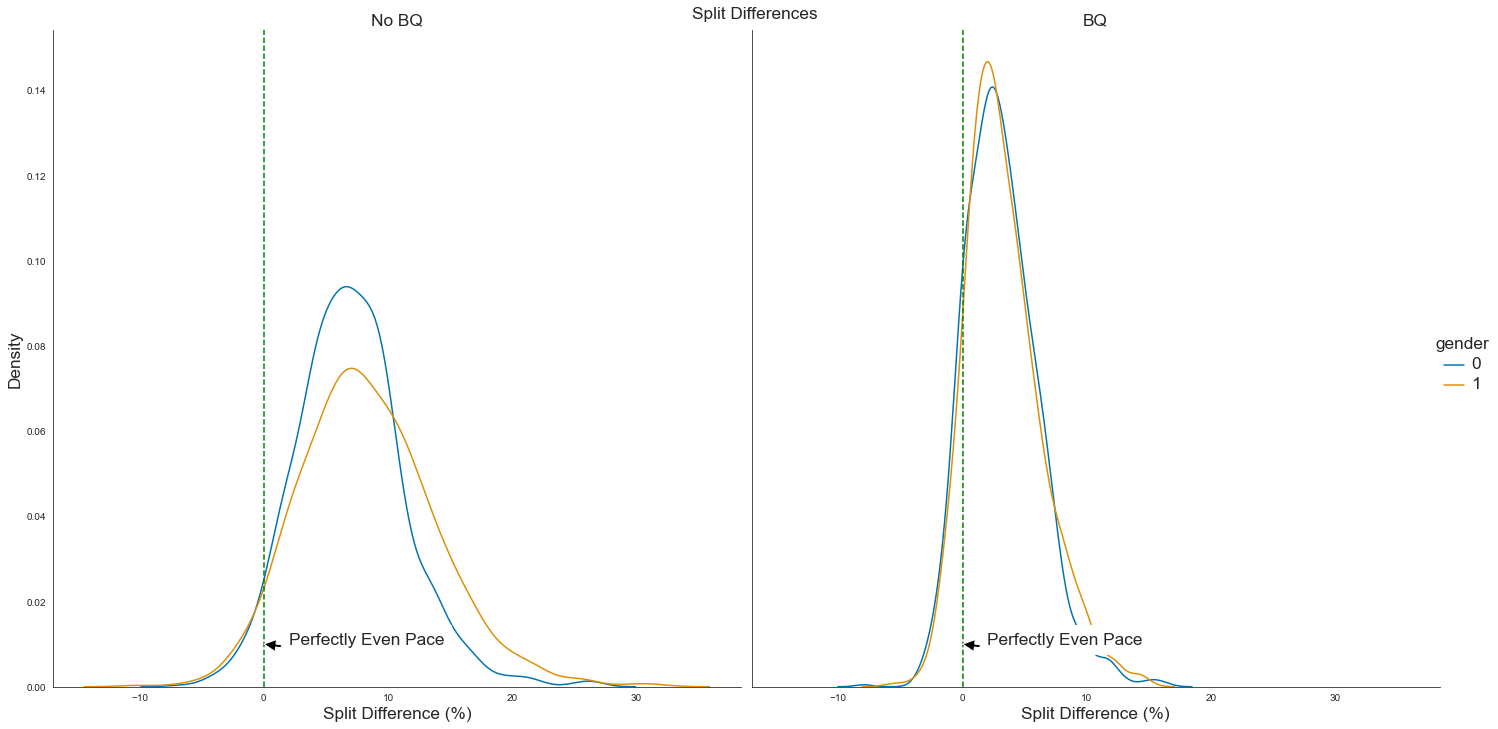

In [11]:
g = sns.FacetGrid(boston, col='bq', hue='gender', height=10)
labels = ['Split Differences', 'No BQ', 'BQ', 'Split Difference (%)']
ef.marathon_facetgrid_axvline(g, 'split_diff', labels)
plt.show()

This might be the most interesting finding so far. The distributions of split differences for men and women who also ran BQ times look almost identical, while the distributions for non-BQ runners look very similar to the overall distributions for men and women that we saw above. Just from looking at these distributions, it appears that BQ runners tended to run much more evenly paced regardless of gender, while non-BQ women tended to run slightly more evenly paced than non-BQ men.

The distributions also look more normal than the overall distribution of split differences, but not perfectly so. We can still see some kurtosis, especially in the non-BQ distributions. This could be an issue later, as one of the assumptions of ANOVA is that the distribution of the y variable (i.e., split difference) is normal within each group. We will look at this more closely when we actually perform the ANOVA.

As before, let's also look at descriptive statistics for split difference broken down by both BQ and gender.

In [12]:
boston[['split_diff', 'group']].groupby(['group']).describe()

split_diff                                       
                 count mean  std    min  25%  50%   75%   max
group                                                        
bq_men         1075.00 3.34 3.05  -5.82 1.22 2.82  5.05 14.81
bq_women       1241.00 3.14 2.94  -7.93 1.02 2.82  4.91 16.34
no_bq_men       986.00 8.36 5.48 -10.32 4.71 7.89 11.66 31.73
no_bq_women    1251.00 6.99 4.39  -6.74 4.12 6.84  9.46 26.76

There is much less of a difference between men and women in the BQ group, though women still have a slightly lower mean and standard deviation. That is, women still ran slightly more evenly paced with more consistency. However, we will need to run the ANOVA to see if this difference is statistically significant.

## III. Multiple Variables

### 1. Finish Time vs. Split Difference

Let's look at the data in two dimensions with a plot of finish time versus split difference.

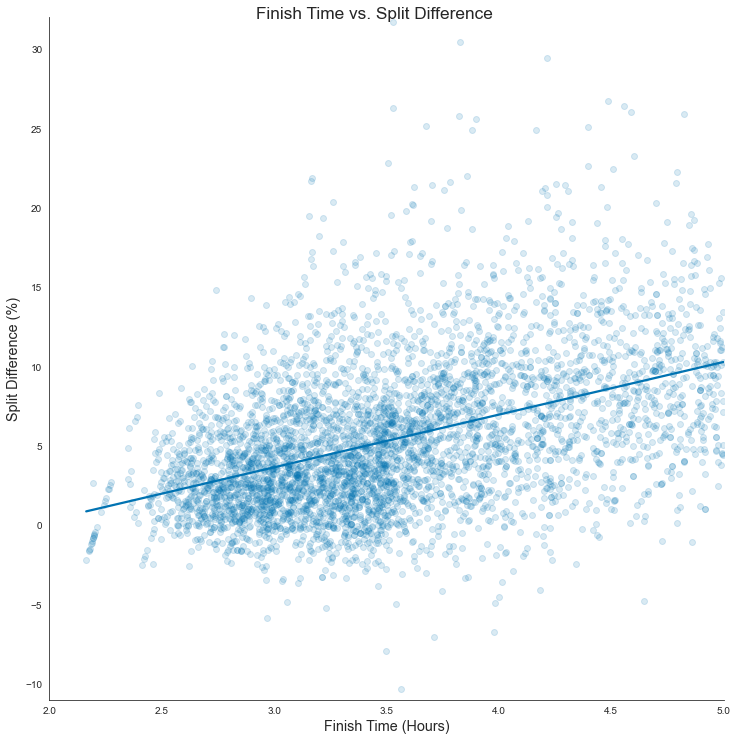

In [13]:
labels = ['Finish Time vs. Split Difference', 'Finish Time (Hours)', 'Split Difference (%)']
ef.marathon_scatter(boston, 'finish', 'split_diff', labels)
plt.show()

There appears to be a general linear trend toward more positively split races as finish time increases, though as finish time increases there is also a lot more variance between runners. This difference in variance could be an issue later when we run an ANOVA, because one of the assumptions of ANOVA is equal variance between the groups being compared.

Let's look at the overall correlation between finish time and split difference using the Pearson correlation coefficient. We will print correlations with a custom print_corr function.

In [14]:
group = ['overall']
corr = [pearsonr(boston['finish'], boston['split_diff'])]
ef.print_corr(group, corr)

Correlation of finish time and split difference (with p-value) (overall): (0.45210080549933673, 2.8461321836973715e-228)


This function displays the correlation coefficient (0.45) on the left and the p-value on the right. The correlation coefficient of 0.45 indicates a moderate correlation between finish time and split difference, while the very low p-value indicates a high level of confidence in this estimate of correlation.

### 2. Finish Time vs. Split Difference by Gender

Next, let's break down the data by gender.

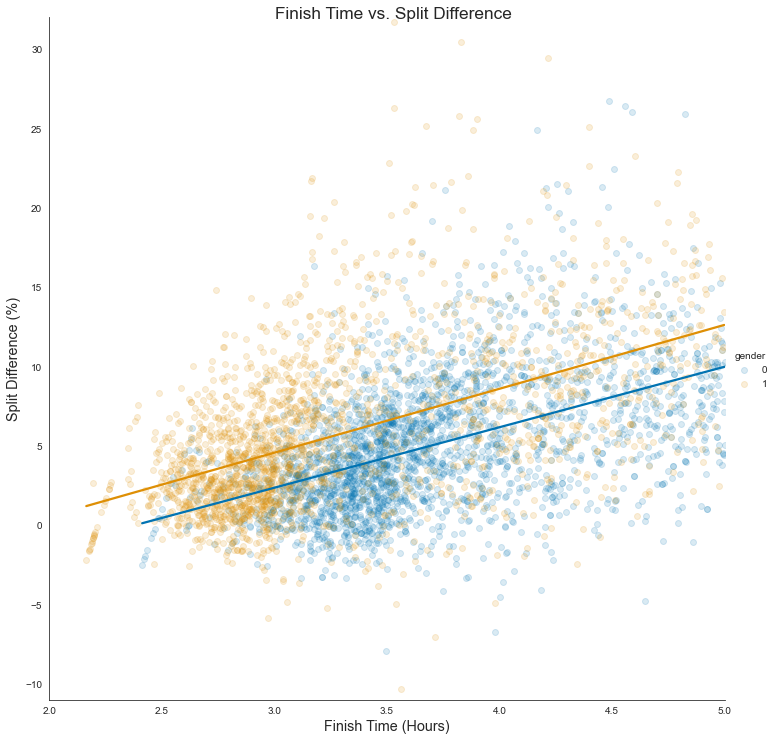

In [15]:
ef.marathon_scatter(boston, 'finish', 'split_diff', labels, hue='gender')
plt.show()

Runners with the most extreme split differences are men. Otherwise, the data shows that the general trend of finish time being positively correlated with split difference still holds when we break down the data by gender, with men's split differences generally being higher than women's.

Another interesting thing to note is that the very fastest men and women actually ran negative splits. As of 2021, 4 of the last 6 marathon world records and the two fastest (official) marathons ever run were all run with a negative splits strategy [4-5]. So, it could be that running an evenly paced marathon is generally a better strategy than running a positively split marathon, but that the very best runners actually run negative splits. This is outside the scope of this project, but it is still an interesting question.

Let's look at correlation between finish time and split difference broken down by gender.

In [16]:
groups = ['men', 'women']
corrs = [pearsonr(boston[boston['gender'] == gender]['finish'], 
                  boston[boston['gender'] == gender]['split_diff'])
         for gender in boston['gender'].unique()]
ef.print_corr(groups, corrs)

Correlation of finish time and split difference (with p-value) (men): (0.5180178977828458, 6.839518582280283e-142)
Correlation of finish time and split difference (with p-value) (women): (0.49187517377232626, 5.514545471879098e-152)


The individual correlations for the data for each gender (0.52 for men, 0.49 for women) are higher than the overall correlation.

### 3. Finish Time vs. Split Difference by BQ and Gender

Next, let's break the data down even further by both BQ and gender.

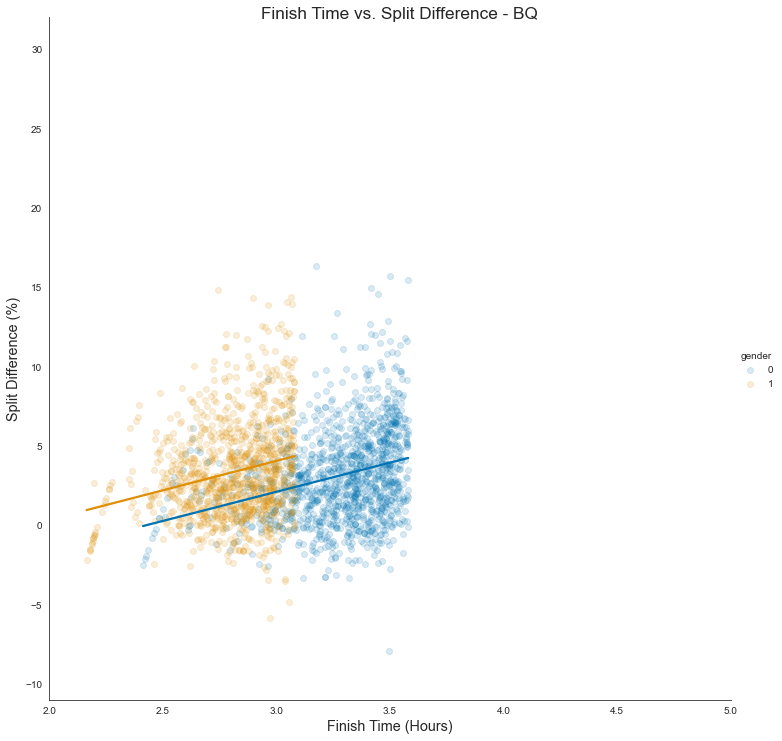

In [17]:
boston_bq = boston[boston['bq'] == 1]
boston_no_bq = boston[boston['bq'] == 0]
labels = labels = ['Finish Time vs. Split Difference - BQ', 'Finish Time (Hours)', 'Split Difference (%)']
ef.marathon_scatter(boston_bq, 'finish', 'split_diff', labels, hue='gender')
plt.show()

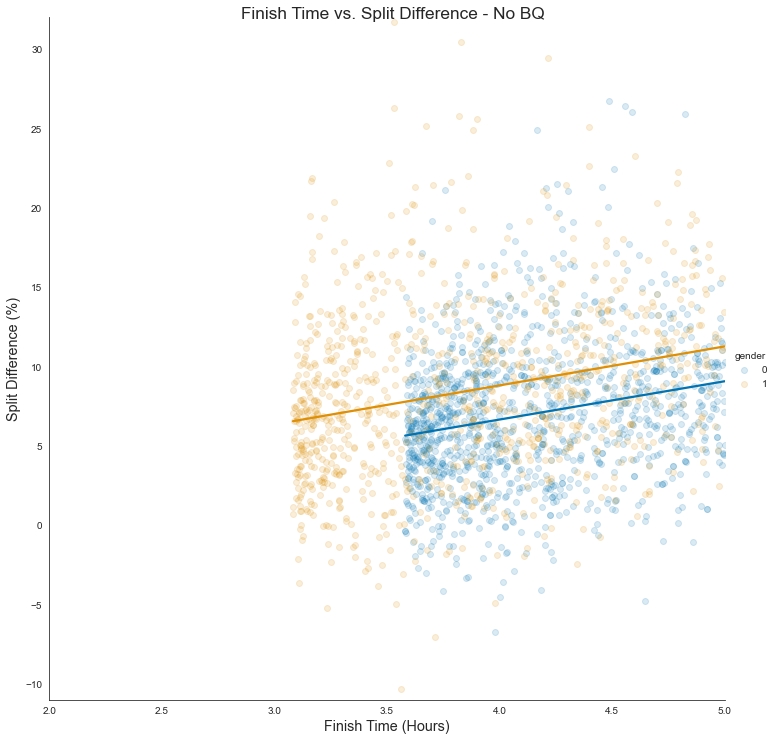

In [18]:
labels = ['Finish Time vs. Split Difference - No BQ', 'Finish Time (Hours)', 'Split Difference (%)']
ef.marathon_scatter(boston_no_bq, 'finish', 'split_diff', labels, hue='gender')
plt.show()

These plots make it easier to see how much less consistent the non-BQ runners were than the BQ runners in their pacing.

Let's look at correlations for this data.

In [19]:
groups = ['bq_men', 'no_bq_men', 'bq_women', 'no_bq_women']
corrs = [pearsonr(boston[boston['group'] == group]['finish'],
                  boston[boston['group'] == group]['split_diff'])\
         for group in boston['group'].unique()]
ef.print_corr(groups, corrs)

Correlation of finish time and split difference (with p-value) (bq_men): (0.22769355044573086, 4.149680106139529e-14)
Correlation of finish time and split difference (with p-value) (no_bq_men): (0.2504700649746334, 1.4337406510646066e-15)
Correlation of finish time and split difference (with p-value) (bq_women): (0.2742351748912374, 7.554093243341516e-23)
Correlation of finish time and split difference (with p-value) (no_bq_women): (0.23015773363596792, 1.6747932430300183e-16)


Now the correlations for individual groups are actually lower than the overall correlation. This looks like it might be a mild illustration of Simpson's Paradox, where a trend that is present in subsets of the data disappears or reverses when the data is aggregated (or vice versa) [6]. While we don't see an outright reversal here, we see a significant change in correlation simply based on how we group the data.

## IV. Conclusion

Now we have a sense that women generally ran more evenly paced than men in the 2021 Boston Marathon, and runners who ran a Boston Marathon qualifying time generally ran more evenly paced than runners who didn't. Moreover, there might be an interaction between the two factors, as we saw that there was almost no difference between men and women among BQ runners, while there was a noticeable difference among non-BQ runners. We can use a two-way factorial ANOVA to test these hypotheses, assuming we can satisfy the assumptions for the ANOVA test. We have seen a few things that might be violations of these assumptions. The distributions for each group are not quite normal, though they are fairly close. Also, there appears to be unequal variance between different groups. We will examine these assumptions more closely when we conduct the ANOVA.

## V. References

1. Reese CS, Ward J. 'Analyzing Split Times For Runners In The 2013 St. George Marathon'. https://www.runblogrun.com/2017/04/17/Jared%20Ward%20Thesis.pdf.
2. Santos-Lozano A, Collado P, Foster C, Lucia A, Garatachea N. (2014) 'Influence of Sex and Level on Marathon Pacing Strategy. Insights from the New York City Race'. International Journal of Sports Medicine. 35. 10.1055/s-0034-1367048. https://www.researchgate.net/publication/260226395_Influence_of_Sex_and_Level_on_Marathon_Pacing_Strategy_Insights_from_the_New_York_City_Race.
3. March DS, Vanderburgh PM, Titlebaum PJ, Hoops ML. (2011) 'Age, Sex, and Finish Time as Determinants of Pacing in the Marathon'. Journal of Strength and Conditioning Research: February 2011 - Volume 25 - Issue 2 - p 386-391. https://journals.lww.com/nsca-jscr/Fulltext/2011/02000/Age,_Sex,_and_Finish_Time_as_Determinants_of.14.aspx.
4. Beverly J. September 30, 2014. 'What World Records Teach About Marathon Pacing'. Runner's World. https://www.runnersworld.com/training/a20819476/what-world-records-teach-about-marathon-pacing/.
5. Kelly M. September 29, 2019, 'A side-by-side comparison of Kipchoge and Bekele’s Berlin Marathons'. Canadian Running. https://runningmagazine.ca/sections/runs-races/a-side-by-side-comparison-of-kipchoge-and-bekeles-berlin-marathons/.
6. Koehrsen W. October 12, 2018, 'Simpson’s Paradox: How to Prove Opposite Arguments with the Same Data.' Towards Data Science. https://towardsdatascience.com/simpsons-paradox-how-to-prove-two-opposite-arguments-using-one-dataset-1c9c917f5ff9.